In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


operações básicas

#alguns exemplos de operações a serem executadas em imagens
#no openCV
#https://pythonprogramming.net/image-arithmetics-logic-python-opencv-tutorial/?completed=/image-operations-python-opencv-tutorial/
#https://docs.opencv.org/3.2.0/d0/d86/tutorial_py_image_arithmetics.html

In [19]:
img = cv2.imread('data/watch.jpg',cv2.IMREAD_COLOR)

#reference specific pixels, like so:
px = img[55,55]
# change a pixel:

img[55,55] = [255,255,255]
#Then re-reference:

px = img[55,55]
print(px)
#It should be different now. Next, we can reference an ROI, or Region of Image, like so:

px = img[100:150,100:150]
print(px)
#We can also modify the ROI, like this:

img[100:150,100:150] = [255,255,255]

[255 255 255]
[[[ 53  48  57]
  [ 53  48  57]
  [ 54  46  56]
  ...
  [ 36  36  42]
  [ 36  36  42]
  [ 56  56  62]]

 [[ 48  43  52]
  [ 50  45  54]
  [ 53  45  55]
  ...
  [ 36  34  40]
  [ 42  40  46]
  [ 39  37  43]]

 [[ 46  41  50]
  [ 47  42  51]
  [ 51  43  53]
  ...
  [ 33  33  39]
  [ 33  33  39]
  [ 56  56  62]]

 ...

 [[ 25  34  47]
  [ 27  36  49]
  [ 30  39  53]
  ...
  [105 114 128]
  [106 114 131]
  [106 114 131]]

 [[ 27  36  50]
  [ 26  35  49]
  [ 26  35  49]
  ...
  [ 96 110 129]
  [105 116 138]
  [109 120 142]]

 [[ 27  36  50]
  [ 25  34  48]
  [ 25  34  48]
  ...
  [101 114 136]
  [100 112 136]
  [107 117 141]]]


2D Convolution ( Image Filtering )
cv2.filter2D() - The function applies an arbitrary linear filter to an image. In-place operation is supported. When the aperture is partially outside the image, the function interpolates outlier pixel values according to the specified border mode.

http://people.csail.mit.edu/sparis/bf_course/

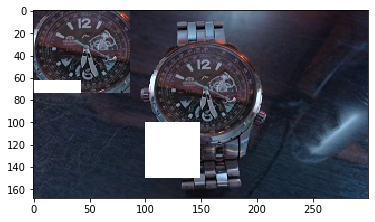

In [22]:
#And we can perform operations, like:

watch_face = img[37:111,107:194]
img[0:74,0:87] = watch_face
plt.imshow(img)


In [20]:
#We can reference certain characteristics of our image:

print(img.shape)
print(img.size)
print(img.dtype)

(168, 300, 3)
151200
uint8


#Image arithmetics and Logic OpenCV Python Tutorial

In [29]:
#adicionar duas imagens
# nesse caso as imagens devem ter extamente para funcionar
# ex500 x 250
img1 = cv2.imread('data/3D-Matplotlib.png')
img2 = cv2.imread('data/mainsvmimage.png')

#para o 4 exemplo de adição (colocando o logo)

img3 = cv2.imread('data/mainlogo.png')

In [26]:
add1 = img1+img2 #sobrepoem uma a outra 

add2 = cv2.add(img1,img2) 
#cv2.add adiciona pixel a pixel exemplo
# (155,211,79) + (50, 170, 200) = 205, 381, 279...
#translated to (205, 255,255). colors are 0-255, where 255 is "full light."
#talvez seja util com uma máscara, ou algum filtro

add3 = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)
#adicion a imagem com um peso (img1, peso img 1, img2, peso 2, gamma)

#cv2.imshow('image',img) #imagem do desenhando no opencv
#cv2.imshow('add',add) #adicionando

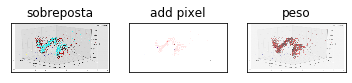

In [28]:
plt.subplot(131),plt.imshow(add1),plt.title('sobreposta')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(add2),plt.title('add pixel')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(add3),plt.title('peso')
plt.xticks([]), plt.yticks([])
plt.show()

adicionando uma imagem menor (exemplo logo) - img3

In [30]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img3.shape
roi = img1[0:rows, 0:cols ]

In [31]:
# Now create a mask of logo and create its inverse mask
img2gray = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)

# add a threshold
#cv2.threshold(img,limiar,valor a ser igulado) - olhar documentação

ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img3_fg = cv2.bitwise_and(img3,img3,mask = mask)

In [32]:
dst = cv2.add(img1_bg,img3_fg)
img1[0:rows, 0:cols ] = dst

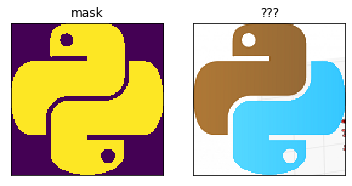

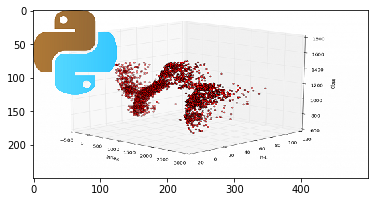

In [36]:
plt.subplot(121),plt.imshow(mask),plt.title('mask')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('???')
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(img1)

In [34]:
cv2.imshow('res',img1)
cv2.imshow('mask', mask)

cv2.waitKey(0)
cv2.destroyAllWindows()

convolução/filtragem

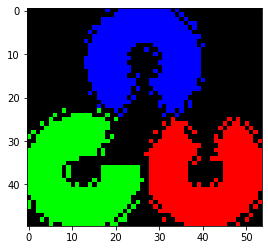

In [37]:
img = cv2.imread('data/opencv-logo-small.png')
plt.imshow(img)
#cv2.imshow('img',img) #janela pop up tem q colocar o release

In [38]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

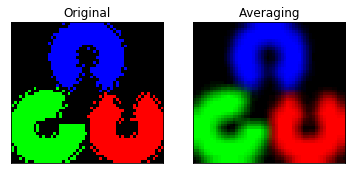

In [39]:
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

Averaging
This is done by convolving image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replace the central element. This is done by the function cv2.blur() or cv2.boxFilter().
Note
If you don't want to use normalized box filter, use cv2.boxFilter(). Pass an argument normalize=False to the function.

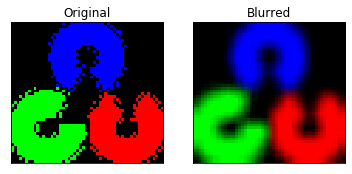

In [40]:
blur = cv2.blur(img,(5,5))
#blur = cv2.blur(nome da imagem, (tamanho do kernel))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

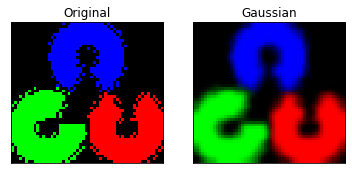

In [41]:
blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.show()

Median Blurring
Here, the function cv2.medianBlur() takes median of all the pixels under kernel area and central element is replaced with this median value. This is highly effective against salt-and-pepper noise in the images. Interesting thing is that, in the above filters, central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

In this demo, I added a 50% noise to our original image and applied median blur. Check the result:

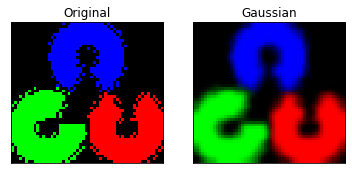

In [42]:
median = cv2.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.show()

Bilateral Filtering - 
is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. 
Bilateral filter also takes a gaussian filter in space, but one more gaussian filter which is a function of pixel difference. Gaussian function of space make sure only nearby pixels are considered for blurring while gaussian function of intensity difference make sure only those pixels with similar intensity to central pixel is considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

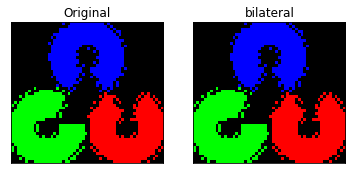

In [43]:
blur = cv2.bilateralFilter(img,9,75,75)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('bilateral')
plt.xticks([]), plt.yticks([])
plt.show()

threshold

In [44]:
img = cv2.imread('data/bookpage.jpg')
img_gray =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [54]:
#simple threshold
retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)
#utilizando escala de cinza
retval, threshold1 = cv2.threshold(img_gray, 10, 255, cv2.THRESH_BINARY)

#adaptative threshold
th = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

#otsu threshold
retval2,threshold2 = cv2.threshold(img_gray,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

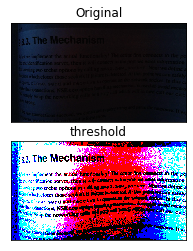

In [57]:
plt.subplot(211),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(threshold),plt.title('threshold')
plt.xticks([]), plt.yticks([])

plt.show()

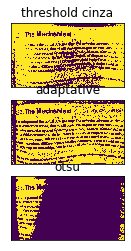

In [59]:
plt.subplot(311),plt.imshow(threshold1),plt.title('threshold cinza')
plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.imshow(th),plt.title('adaptative')
plt.xticks([]), plt.yticks([])
plt.subplot(313),plt.imshow(threshold2),plt.title('otsu')
plt.xticks([]), plt.yticks([])
plt.show()

In [62]:
cv2.imshow('original',img)
cv2.imshow('threshold',threshold)
cv2.imshow('cinza', img_gray)
cv2.imshow('th no cinza',threshold1)
cv2.imshow('adaptativo',th)
cv2.imshow('otsu', threshold2)

In [63]:
#release para a imgem da opencv - obrigatório
cv2.waitKey(0)
cv2.destroyAllWindows()